## NetFlix
It is a dataset containing movies and tv shows available on the Netflix streaming platform.The dataset has been taken from the web site: https://www.kaggle.com/datasets/shivamb/netflix-shows?select=netflix_titles.csv

In [110]:
import pandas as pd
import numpy as np

# loading the dataset into a dataframe

data = pd.read_csv("data/NetFlix.csv")

In [98]:
# Number of records is checked

print("Dataframe contains {} records".format(len(data.index)))

Dataframe contains 7787 records


In [99]:
# The first 3 rows of the dataframe are displayed

data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...


In [100]:
# The columns of the dataframe shown

data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

### Processing missing values:
The missing values are then identified, replaced and verified as no longer existing in the dataframe.

In [101]:
# The number of missing values in each variable is identified

data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

Missing values in attributes: rating, director, cast, country are replaced by "Not reported" and date_added by "2262-04-11" which is the maximum date allowed by pandas

In [119]:
# Missing values are changed

data.fillna({'date_added': pd.Timestamp.max.date()}, inplace=True)
data.fillna({'rating': "not reported"}, inplace=True)
data.fillna({'director': "not reported"}, inplace=True)
data.fillna({'cast': "not reported"}, inplace=True)
data.fillna({'country': "not reported"}, inplace=True)

# the changes are checked

y = data[(data.rating == "not reported")]
z = data[(data.director == "not reported")]
w = data[(data.cast == "not reported")]
v = data[(data.country == "not reported")]
p = data[(data.date_added == pd.Timestamp.max.date())]
print("{} NaN were replaced in variable rating".format(len(y["rating"])))
print("{} NaN were replaced in variable director".format(len(z["director"])))
print("{} NaN were replaced in variable cast".format(len(w["cast"])))
print("{} NaN were replaced in variable country".format(len(v["country"])))
print("{} NaN were replaced in variable date_added".format(len(p["date_added"])))

7 NaN were replaced in variable rating
2389 NaN were replaced in variable director
718 NaN were replaced in variable cast
507 NaN were replaced in variable country
0 NaN were replaced in variable date_added


In [112]:
# The dataframe is checked to ensure that it no longer has missing values

data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

since the date_added attribute contains different date formats: dd-month-yy, month d, yyyy, month dd, yyyy and we proceed to unify in one single format yyyy-mm-dd.

In [113]:
data["date_added"] = pd.to_datetime(data["date_added"], errors='coerce')
data["date_added"]

0      2020-08-14
1      2017-12-15
2      2019-01-05
3      2016-03-01
4      2018-12-03
          ...    
7782   2019-07-12
7783   2020-09-01
7784   2016-08-26
7785   2019-03-08
7786   2016-12-06
Name: date_added, Length: 7787, dtype: datetime64[ns]

In the following cells are identified: 
1. The different types of content and how many movies and shows which is expected to be only movies and tv-shows.
2. The different types of rating
3. How many movies and shows belong to each rating
4. The different years of release and how many were made in each one

In [11]:
# Unique values are checked in the column type

u = data.type.unique()
print("There are {} unique values in the  column type:\n{}".format(len(u), u))

movies = data[data.type == "Movie"]
tv_shows = data[data.type == "TV Show"]
print("{} are movies".format(len(movies)))
print("{} are TV-shows".format(len(tv_shows)))
print()

There are 2 unique values in the  column type:
['TV Show' 'Movie']
5377 are movies
2410 are TV-shows



In [21]:
# Unique values are checked in the column rating

rating = pd.unique(data["rating"])
print("There are {} unique values in the column rating".format(len(rating)))

There are 15 unique values in the column rating


In [123]:
# Identify how many TV-shows and movies there are for each classification

grouped = data.groupby("rating")
rat_dict = {}
for name, group in grouped:
    print(name + ":", len(group))
    rat_dict[name] = len(group)

G: 39
NC-17: 3
NR: 84
PG: 247
PG-13: 386
R: 665
TV-14: 1931
TV-G: 194
TV-MA: 2863
TV-PG: 806
TV-Y: 280
TV-Y7: 271
TV-Y7-FV: 6
UR: 5
not reported: 7


In [131]:
# The different release years contained in the dataframe are checked

year = data.release_year.unique()
print("There are {} unique values in the column release_year".format(len(year)))

year_grouped = grouped = data.groupby("release_year")

for name, group in year_grouped:
    print("in {}: {}".format(name, len(group)))

There are 73 unique values in the column release_year
in 1925: 1
in 1942: 2
in 1943: 3
in 1944: 3
in 1945: 3
in 1946: 2
in 1947: 1
in 1954: 2
in 1955: 3
in 1956: 2
in 1958: 3
in 1959: 1
in 1960: 4
in 1962: 3
in 1963: 2
in 1964: 1
in 1965: 2
in 1966: 1
in 1967: 5
in 1968: 5
in 1969: 2
in 1970: 2
in 1971: 5
in 1972: 4
in 1973: 10
in 1974: 7
in 1975: 6
in 1976: 9
in 1977: 7
in 1978: 6
in 1979: 11
in 1980: 9
in 1981: 9
in 1982: 15
in 1983: 9
in 1984: 9
in 1985: 9
in 1986: 10
in 1987: 7
in 1988: 16
in 1989: 13
in 1990: 20
in 1991: 17
in 1992: 18
in 1993: 22
in 1994: 16
in 1995: 19
in 1996: 19
in 1997: 30
in 1998: 31
in 1999: 33
in 2000: 34
in 2001: 36
in 2002: 45
in 2003: 49
in 2004: 59
in 2005: 73
in 2006: 85
in 2007: 85
in 2008: 125
in 2009: 137
in 2010: 173
in 2011: 166
in 2012: 219
in 2013: 267
in 2014: 334
in 2015: 541
in 2016: 882
in 2017: 1012
in 2018: 1121
in 2019: 996
in 2020: 868
in 2021: 31


In the list above you can see that between 2008 and 2020 more movies and shows were released. This can be confirmed on a density plot in a subsequent cell.

### Data Visualization
A bar graph represents the number of movies and shows for each rating. 

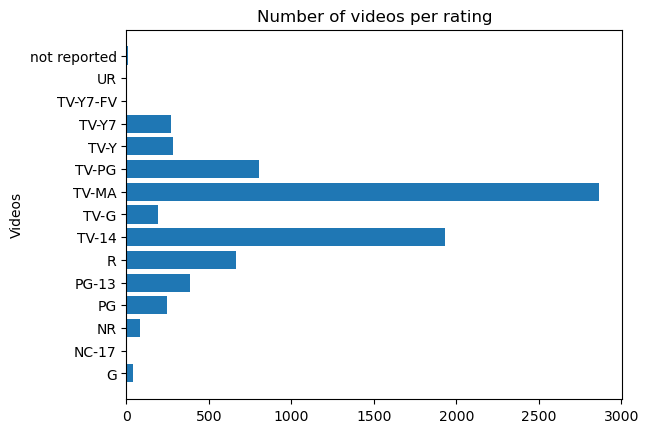

In [125]:
# The function create_graphs is created

import matplotlib.pyplot as plt

def create_graphs(gp):

    """
    generates a bar chart showing the number of videos and tv shows for each rating.
    :param gp: receives a tuple containing the number of movies and tv shows for each genre
    :return: a graph
    """
    ratings = [name for name, group in gp]
    counts = [len(group) for name, group in gp]

    fig, ax = plt.subplots()
    # axis Y
    ax.set_ylabel('Videos')
    # axis X
    ax.set_title('Number of videos per rating')

    # creation of the graphic
    plt.barh(ratings, counts)
    plt.savefig('bar_graphic.png')
    plt.show()

def create_graphs2(di):

    """
    Return a pastel graph showing the percentage of videos and tv shows for each rating.
    :param di: sorted dictionary containing the number of movies and shows for each rating
    :return: pastel graph
    """

    # list of ratings
    ratings_list = []

    # percentage for each rating
    sizes = []
    s = 0
    n = 0
    v2 = 0
    for v1 in di.values():
        s = s + v1
    for k, v in di.items():

        # the 6 ratings with the highest number of appearances are displayed
        if n <= 6:
            ratings_list.append(k)
            sizes.append((v*100)/s)
            n = n + 1
            v2 += v
        else:
            ratings_list.append("anothers")
            sizes.append((s-v2)*100/s)
            break

    ratings_list2 = tuple(ratings_list)

    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=ratings_list2, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title("Main Classifications")
    plt.legend(loc ="lower left")
    plt.savefig('pastel_graph.png')
    plt.show()


# The amount of movies and tv-shows by rating is shown in a bar graph
create_graphs(grouped)

A pie graph represents the percentage of movies and shows for each rating

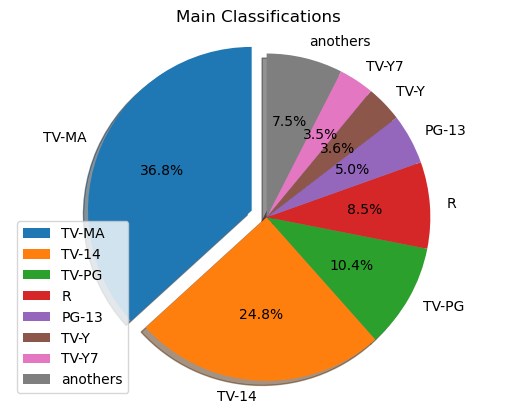

In [126]:
# create_graphs2 is created
    
def create_graphs2(di):

    """
    Return a pastel graph showing the percentage of videos and tv shows for each rating.
    :param di: sorted dictionary containing the number of movies and shows for each rating
    :return: pastel graph
    """

    # list of ratings
    ratings_list = []

    # percentage for each rating
    sizes = []
    s = 0
    n = 0
    v2 = 0
    for v1 in di.values():
        s = s + v1
    for k, v in di.items():

        # the 6 ratings with the highest number of appearances are displayed
        if n <= 6:
            ratings_list.append(k)
            sizes.append((v*100)/s)
            n = n + 1
            v2 += v
        else:
            ratings_list.append("anothers")
            sizes.append((s-v2)*100/s)
            break

    ratings_list2 = tuple(ratings_list)

    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=ratings_list2, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title("Main Classifications")
    plt.legend(loc ="lower left")
    plt.savefig('pastel_graph.png')
    plt.show()
    
# rat_dict dictionary is sorted
rat_dict_sorted = dict(sorted(rat_dict.items(), key=lambda item: item[1], reverse=True))

# The percentage of movies and tv-shows by rating is shown in a pastel graph
create_graphs2(rat_dict_sorted)

With a density graph visualizing the data distribution between the years 1925 and 2021

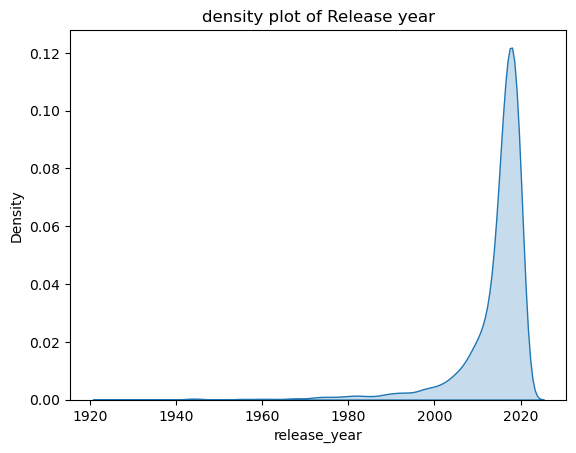

In [52]:
import seaborn as sns

# A density graph is created

sns.kdeplot(x=data['release_year'], shade=True)
plt.title("density plot of Release year")
plt.show()

We can confirm that between 2008 and 2022 were the years where the most movies and TV shows were released because it is a high density (high peak) region.

In [34]:
# Number of movies and tv shows by ratings

# Dataframe grouping by type and rating

grouped2 = data.groupby(["rating", "type"])
print("Number of Movies and Tv-shows by rating are:")
for name, group in grouped2:
    print("there are {} {} that are rating {}".format(len(group), name[1], name[0]))

Number of Movies and Tv-shows by rating are:
there are 39 Movie that are rating G
there are 3 Movie that are rating NC-17
there are 79 Movie that are rating NR
there are 5 TV Show that are rating NR
there are 247 Movie that are rating PG
there are 386 Movie that are rating PG-13
there are 663 Movie that are rating R
there are 2 TV Show that are rating R
there are 1272 Movie that are rating TV-14
there are 659 TV Show that are rating TV-14
there are 111 Movie that are rating TV-G
there are 83 TV Show that are rating TV-G
there are 1845 Movie that are rating TV-MA
there are 1018 TV Show that are rating TV-MA
there are 505 Movie that are rating TV-PG
there are 301 TV Show that are rating TV-PG
there are 117 Movie that are rating TV-Y
there are 163 TV Show that are rating TV-Y
there are 95 Movie that are rating TV-Y7
there are 176 TV Show that are rating TV-Y7
there are 5 Movie that are rating TV-Y7-FV
there are 1 TV Show that are rating TV-Y7-FV
there are 5 Movie that are rating UR
there 

In [38]:
# The function identifies_genres_countries is created

def identifies_genres_countries(gr):

    """
    returns a list with de the differents genres or countries
    :param gr: array of one dimension
    :return data_list: list with the differents genres or countries
    """

    # An empty list is created
    data_dict = {}

    # Each element of the array gr is iterated, converting it into a list of lists.
    for i in list(gr):

        # Separate each item in the list by commas and spaces
        y = i.split(sep=", ")

        for x in y:

            x = x.replace(",", "")

            if x in data_dict:
                data_dict[x] += 1

            else:
                data_dict[x] = 1

    return data_dict

# The different genres that exist are searched

genres = pd.unique(data["genres"])
print("There are {} differents genres, they are:".format(len(identifies_genres_countries(genres))))

dic_g = identifies_genres_countries(genres)
dic_g_sorted = dict(sorted(dic_g.items(), key=lambda item:item[1], reverse=True))

for k, v in dic_g_sorted.items():
    print(k, v)

# The different countries that exist are searched

countries = pd.unique(data["country"])
print()
print("There are {} countries, where the movie/show was produced:".format(len(identifies_genres_countries(countries))))
print()

dic_c = identifies_genres_countries(countries)
for k, v in dic_c.items():
    print(k, v)


There are 42 differents genres, they are:
Dramas 79
International TV Shows 75
Comedies 74
International Movies 69
TV Dramas 62
Action & Adventure 61
TV Comedies 51
TV Action & Adventure 41
Independent Movies 40
Crime TV Shows 40
Children & Family Movies 38
Sci-Fi & Fantasy 38
Romantic Movies 35
Music & Musicals 34
Classic Movies 33
Horror Movies 32
Thrillers 31
Kids' TV 31
TV Sci-Fi & Fantasy 28
British TV Shows 28
Docuseries 28
Sports Movies 27
Romantic TV Shows 27
Reality TV 26
Cult Movies 25
TV Horror 25
Documentaries 24
Spanish-Language TV Shows 21
TV Mysteries 21
Teen TV Shows 20
LGBTQ Movies 19
TV Thrillers 18
Anime Series 16
Faith & Spirituality 16
Classic & Cult TV 15
Anime Features 14
Science & Nature TV 12
Korean TV Shows 10
Stand-Up Comedy & Talk Shows 9
Stand-Up Comedy 3
TV Shows 1
Movies 1

There are 118 countries, where the movie/show was produced:

Brazil 16
India 44
Indonesia 10
United States 320
United Kingdom 180
France 151
Germany 107
Canada 110
Japan 32
Thailand 8
n

In [43]:
# The function age_rating is created

def age_rating(xx):

    """
    Return a string with the description about the ratings
    :param xx: rating
    :return val: description of the rating
    """
    if xx == "TV-MA":
        val = "for ages 18 and older"
        return val
    elif xx == "TV-PG" or xx == "PG":
        val = "with parental supervision"
        return val
    elif xx == "R":
        val = "with parental supervision for children under 17 years of age"
        return val
    elif xx == "TV-G":
        val = "suitable for all audiences"
        return val
    elif xx ==  "PG-13":
        val = "Parental supervision for children under 13 years of age"
        return val
    elif xx == "TV-14":
        val = "Parental supervision is strongly recommended"
        return val
    elif xx == "TV-Y":
        val = "For children of all ages"
        return val
    elif xx == "TV-Y7":
        val = "for children 7 years and older"
        return val
    elif xx == "NR" or xx == "UR":
        val = "Not Rated"
        return val
    elif xx == "G":
        val = "All children and the general public"
        return val
    elif xx == "TV-Y7-FV":
        val = "children 7 years of age and older. Contains fantasy violence"
        return val
    elif xx == "not reported":
        val = "not informed"
        return val
    elif xx == "NC-17":
        val = "Not allowed for children under 17"
        return val


# A column is created indicating the description for each rating

data["description_rating"] = data["rating"].apply(age_rating)
data["description_rating"]

0                                   for ages 18 and older
1                                   for ages 18 and older
2                               with parental supervision
3       with parental supervision for children under 1...
4                              suitable for all audiences
                              ...                        
7782         Parental supervision is strongly recommended
7783                                for ages 18 and older
7784                    Not allowed for children under 17
7785    Parental supervision for children under 13 yea...
7786                                for ages 18 and older
Name: description_rating, Length: 7787, dtype: object

In the previous cell a new attribute is created containing a brief description of the rating attribute